<a href="https://colab.research.google.com/github/newman001/neural-net-for-classification/blob/master/Lenet5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import random
import numpy as np


random.seed(0)
np.random.seed(0)
torch.manual_seed(0)
torch.cuda.manual_seed(0)
torch.backends.cudnn.deterministic = True

In [0]:
import torchvision.datasets

In [0]:
MNIST_train = torchvision.datasets.MNIST('./', download=True, train=True)
MNIST_test = torchvision.datasets.MNIST('./', download=True, train=False);

In [26]:
X_train = MNIST_train.train_data
y_train = MNIST_train.train_labels
X_test = MNIST_test.test_data
y_test = MNIST_test.test_labels

/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:53: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:43: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


In [27]:
len(y_train), len(y_test)

(60000, 10000)

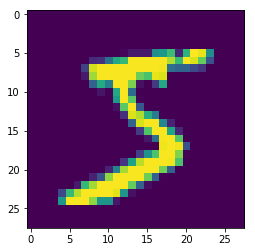

tensor(5)


In [28]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0, :, :])
plt.show()
print(y_train[0])

In [0]:
X_train = X_train.unsqueeze(1).float()
X_test = X_test.unsqueeze(1).float()

In [30]:
X_train.shape

torch.Size([60000, 1, 28, 28])

In [0]:
class LeNet5(torch.nn.Module):
  def __init__(self):
    super(LeNet5, self).__init__()
    
    self.conv1 = torch.nn.Conv2d(
      in_channels=1, out_channels=6, kernel_size=5, padding=2)
    self.act1 = torch.nn.Tanh()
    self.pool1 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.conv2 = torch.nn.Conv2d(
      in_channels=6, out_channels=16, kernel_size=5, padding=0)
    self.act2 = torch.nn.Tanh()
    self.pool2 = torch.nn.AvgPool2d(kernel_size=2, stride=2)
    
    self.fc1 = torch.nn.Linear(5*5*16, 120)
    self.act3 = torch.nn.Tanh()
    
    self.fc2 = torch.nn.Linear(120, 84)
    self.act4 = torch.nn.Tanh()
    
    self.fc3 = torch.nn.Linear(84, 10)
    
  def forward(self, x):
    x = self.conv1(x)
    x = self.act1(x)
    x = self.pool1(x)
    
    x = self.conv2(x)
    x = self.act2(x)
    x = self.pool2(x)
    
    x = x.view(x.size(0), x.size(1) * x.size(2) * x.size(3))
    
    x = self.fc1(x)
    x = self.act3(x)
    x = self.fc2(x)
    x = self.act4(x)
    x = self.fc3(x)
    
    return x
  
lenet5 = LeNet5()

In [0]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
lenet5 = lenet5.to(device)

In [0]:
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(lenet5.parameters(), lr=1.0e-3)

In [34]:
batch_size = 100

test_accuracy_history = []
test_loss_history = []

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(100):
  order = np.random.permutation(len(X_train))
  for start_index in range(0, len(X_train), batch_size):
    optimizer.zero_grad()
    
    batch_indexes = order[start_index:start_index+batch_size]
    
    X_batch = X_train[batch_indexes].to(device)
    y_batch = y_train[batch_indexes].to(device)
    
    preds = lenet5.forward(X_batch)
    
    loss_value = loss(preds, y_batch)
    loss_value.backward()
    
    optimizer.step()
    
  test_preds = lenet5.forward(X_test)
  test_loss_history.append(loss(test_preds, y_test).data.cpu())
  
  accuracy = (test_preds.argmax(dim=1) == y_test).float().mean().data.cpu()
  test_accuracy_history.append(accuracy)
  
  print(accuracy)

tensor(0.9776)
tensor(0.9827)
tensor(0.9857)
tensor(0.9873)
tensor(0.9885)
tensor(0.9879)
tensor(0.9875)
tensor(0.9879)
tensor(0.9887)
tensor(0.9878)
tensor(0.9890)
tensor(0.9890)
tensor(0.9890)
tensor(0.9865)
tensor(0.9892)
tensor(0.9896)
tensor(0.9900)
tensor(0.9885)
tensor(0.9877)
tensor(0.9902)
tensor(0.9892)
tensor(0.9865)
tensor(0.9883)
tensor(0.9875)
tensor(0.9879)
tensor(0.9887)
tensor(0.9875)
tensor(0.9888)
tensor(0.9889)
tensor(0.9896)
tensor(0.9884)
tensor(0.9877)
tensor(0.9859)
tensor(0.9887)
tensor(0.9882)
tensor(0.9882)
tensor(0.9898)
tensor(0.9887)
tensor(0.9909)
tensor(0.9904)
tensor(0.9877)
tensor(0.9889)
tensor(0.9884)
tensor(0.9875)
tensor(0.9878)
tensor(0.9883)
tensor(0.9885)
tensor(0.9879)
tensor(0.9887)
tensor(0.9896)
tensor(0.9892)
tensor(0.9891)
tensor(0.9886)
tensor(0.9887)
tensor(0.9883)
tensor(0.9856)
tensor(0.9880)
tensor(0.9890)
tensor(0.9904)
tensor(0.9882)
tensor(0.9869)
tensor(0.9885)
tensor(0.9880)
tensor(0.9903)
tensor(0.9877)
tensor(0.9879)
tensor(0.9

In [35]:
lenet5.forward(X_test)

tensor([[ -5.9865,   0.0931,  -1.5361,  ...,  25.0723,  -4.6183,   3.8424],
        [  2.2943,   1.9015,  25.6710,  ...,  -5.9593,   4.6402,  -6.1186],
        [ -2.7020,  24.1293,  -2.8759,  ...,   2.7067,   1.0890,  -5.8098],
        ...,
        [ -9.4006,  -3.2353,  -4.7947,  ...,  -0.8612,   0.1374,   6.5224],
        [ -1.9373,  -4.9278, -12.2250,  ..., -11.0302,   5.6198,  -4.1411],
        [  5.5723,  -5.6313,  -0.2757,  ..., -16.1524,   1.2937,  -6.5716]],
       device='cuda:0', grad_fn=<AddmmBackward>)

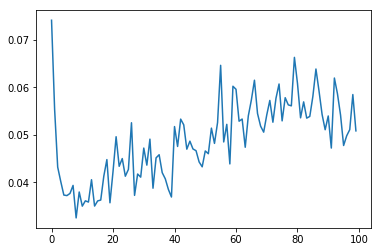

In [36]:
# plt.plot(test_accuracy_history);
plt.plot(test_loss_history);